# Data Wrangling Practice - WeRateDogs

## Introduction
This notebook was used to practice data wrangling on the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. 

In [1454]:
# Load dependencies
import os
import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

## Gather

### Manually Download twitter-archive-enhanced.csv

In [55]:
# Load twitter-archive-enhanced.csv into df
twitter_archive_df = pd.read_csv('data/twitter-archive-enhanced.csv')

### Programmatically Download image-predictions.tsv

In [30]:
# Create tsv file from 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
with open(os.path.join('/Users/michaelgysel/Google Drive/Computer Science/Udacity/Data Analyst/P6 - Data Wrangling/Project/data','image-predictions.tsv'), 'wb') as file:
    file.write(requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv').content)

# Read tsv as a df
image_predictions_df = pd.read_csv('data/image-predictions.tsv', delimiter='\t')

### WeRateDogs data from Twitter API

In [171]:
# Import tweepy, used to access Twitter API
import tweepy

# Pass keys for authorization
auth = tweepy.OAuthHandler('kIZwzcWyaboEOoXhrJztvkfKe', 'TCWzmbNpG5bsoQEI1SvHnvy7EcEZxYsQrc0l7yeOa8vQctGnP9')
auth.set_access_token('997282837047857152-L1IkkdmlV2aTH3cWyyJYCzOFBrRlq48', 'vckftFFAuni0iEiNrBbs6aQVe7i5In6SFrBMwxNKFJ2VV')

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [626]:
# Write each tweet to the tweet_json.txt file

# Store tweets in tweet_json.txt file
with open(os.path.join(os.getcwd(),'tweet_json.txt'), 'w') as file:
    # Number of tweets to lookup (i to num_tweets)
    i = 0
    num_tweets_index = len(twitter_archive_df.tweet_id) - 1
    # Loop through all of the tweets in twitter_archive_df
    while i < num_tweets_index:
        # Obtain tweet_ids
        tweet_ids = twitter_archive_df.tweet_id.iloc[i:i+100].tolist()
        # Obtain tweets from tweepy
        tweets = api.statuses_lookup(tweet_ids)
        # Write each tweet to the file
        for tweet in tweets:
            file.write(json.dumps(tweet._json))
            file.write('\n')
        i += 100

In [646]:
# read tweet_json.txt line by line into a pandas DataFrame with 
# tweet_id, retweet_count, and favorite_count.

# Variable to hold tweets
tweets
# Open tweet_json.txt
with open('tweet_json.txt', 'r') as file:
    # Append each line to tweets list
    tweets = file.readlines()
    
# Create empty list to hold tweet_id, retweet_count, favorite_count for each tweet
twitter_archive_additional = []

# Loop through tweets, append twitter_archive_additional_df
# with tweet_id, retweet_count, and favorite_count
for tweet in tweets:
    this_tweet = json.loads(tweet.replace('\n',''))
    tweet_id = this_tweet['id']
    retweet_count = this_tweet['retweet_count']
    favorite_count = this_tweet['favorite_count']
    twitter_archive_additional.append({'tweet_id': tweet_id, 
                                       'retweet_count': retweet_count, 
                                       'favorite_count': favorite_count}) 

# Turn list into dataframe
twitter_archive_additional_df = pd.DataFrame(twitter_archive_additional, columns=['tweet_id',
                                                                                  'retweet_count',
                                                                                  'favorite_count'])

## Assess

### twitter_archive_df

#### Summary of Data Issues
- Quality
    - 'None' values in doggo, floofer, pupper, and puppo columns are non-null values
    - timestamp of object type
    - rating_numerator has some odd values like 960, 666, 1776
    - rating_denominator not always 10
    - name has erroneous values like 'a', 'the', 'an'
    - some expanded_urls columns have more than one url separated by a comma
- Tidiness
    - dog stage column names (doggo, floofer, pupper, and puppo) are categories 
    - replies and retweets included as observations
    
#### Visual Assessment

In [155]:
# Visual check
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


The following issues were determined from the visual assessment:
- dog stage column names (doggo, floofer, pupper, and puppo) are categories
- replies and retweets included as observations

#### Programmatic Assessment

In [103]:
# Check data types and null values
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Issues determined from checking the data types:
- 'None' values in doggo, floofer, pupper, and puppo columns are non-null values
- timestamp, retweeted_status_timestamp of object type
- in_reply_to_status_id, in_reply_to_user_id retweeted_status_id, retweeted_status_user_id of float type

In [104]:
# Check for duplicates
twitter_archive_df.duplicated().sum()

0

In [108]:
# Check values for each column
twitter_archive_df.iloc[:,4].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

Issues determined from checking the value_counts for each column:
- rating_numerator has some odd values like 960, 666, 1776
- rating_denominator not always 10
- name has erroneous values like 'a', 'the', 'an'
- some expanded_urls columns have more than one url separated by a comma

### image_predictions_df

#### Summary of Data Issues
- Quality
    - none
- Tidiness
    - none
    
#### Visual Assessment

In [98]:
# Visual assessment of image_predictions_df
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


No initial issues were found from the visual assessment.

#### Programmatic Assessment

In [100]:
# Check data types and null values
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [109]:
# Check for duplicates
image_predictions_df.duplicated().sum()

0

In [131]:
# Check values for each column
image_predictions_df.iloc[:,2].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

Possible issues determined from the programmatic assessment.

In [138]:
# Check for impossible values on p1_conf, p2_conf, and p3_conf
image_predictions_df.query('p1_conf > 1 or p1_conf < 0')
image_predictions_df.query('p2_conf > 1 or p2_conf < 0')
image_predictions_df.query('p3_conf > 1 or p3_conf < 0')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### twitter_archive_additional_df

#### Summary of Data Issues
- Quality
    - none
- Tidiness
    - retweet_count, favorite_count relate to columns in twitter_archive_df
    
#### Visual Assessment

In [651]:
# Visual assessment of twitter_archive_additional_df
twitter_archive_additional_df.head()

,tweet_id,retweet_count,favorite_count
0,876484053909872640,2434,18814
1,886366144734445568,3208,21159
2,877611172832227328,81,0
3,888078434458587136,3526,21778
4,891689557279858688,8713,42214


Issues determined from the visual assessment:
- The retweet_count and favorite_count are related to columns in twitter_archive_df

#### Programmatic Assessment

In [652]:
# Check data types and null values
twitter_archive_additional_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
tweet_id          2345 non-null int64
retweet_count     2345 non-null int64
favorite_count    2345 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


Issues determined from checking info:
- twitter_archive_additional_df contains 2345 observations while twitter_archive_df contains 2356 observations.

In [656]:
# Check for duplicates
twitter_archive_additional_df.duplicated().sum()

0

In [660]:
# Check values for each column
twitter_archive_additional_df.iloc[:,1].value_counts()

81       5
669      4
305      4
679      4
174      4
1744     4
248      4
499      4
391      4
223      4
736      4
258      4
459      4
2091     4
1308     4
284      4
2620     4
272      4
4894     3
1362     3
1195     3
1290     3
1090     3
93       3
1084     3
198      3
617      3
141      3
7969     3
1284     3
        ..
367      1
369      1
2424     1
24337    1
1294     1
2434     1
8583     1
2366     1
2362     1
239      1
269      1
243      1
245      1
247      1
4349     1
10494    1
4353     1
4355     1
1470     1
273      1
2360     1
2324     1
283      1
18716    1
6448     1
2344     1
8489     1
303      1
26928    1
0        1
Name: retweet_count, Length: 1717, dtype: int64

All values appear accurate/consistent

## Clean

### twitter_archive_df

#### Summary of Data Issues
- Quality
    - shrink dog stage columns (doggo, floofer, pupper, and puppo columns.)
    - change timestamp datatype from object to datetime
    - check/modify any incorrect rating_numerator values
    - check/modify any incorrect rating_denominator values
    - check/modify any incorrect name values like 'a', 'the', 'an'
- Tidiness
    - remove replies
    - remove retweets
    - join twitter_archive_additional_df

In [1294]:
# Make copy of twitter_archive_df
twitter_archive_df_clean = twitter_archive_df.copy()
# Make copy of twitter_archive_additional_df
twitter_archive_additional_df_clean = twitter_archive_additional_df.copy()

#### Replies

##### Define
- Remove replies
- Remove in_reply_to_status_id and in_reply_to_user_id columns

##### Code

In [1295]:
# Remove observations with in_reply_to_status_id or in_reply_to_user_id columns
twitter_archive_df_clean = twitter_archive_df_clean[twitter_archive_df_clean.in_reply_to_status_id.isnull()]
# Drop in_reply_to_status_id and in_reply_to_user_id columns
twitter_archive_df_clean.drop(axis=1, columns=['in_reply_to_status_id', 'in_reply_to_user_id'], inplace=True)

##### Test

In [1296]:
# Check that in_reply_to_status_id and in_reply_to_user_id columns dropped
twitter_archive_df_clean.head()

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Retweets

##### Define
- Remove retweets
- Remove retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns

##### Code

In [1297]:
# Remove observations with retweeted_status_id, retweeted_status_user_id, or retweeted_status_timestamp
twitter_archive_df_clean = twitter_archive_df_clean[twitter_archive_df_clean.retweeted_status_id.isnull()]
# Drop retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns
twitter_archive_df_clean.drop(axis=1, columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

##### Test

In [1298]:
# Check that retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns dropped
twitter_archive_df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Join twitter_archive_df and twitter_archive_additional_df

##### Define
Join twitter_archive_df_clean and twitter_archive_additional_df_clean on tweet_id

##### Code

In [1299]:
# Join twitter_archive_df_clean and twitter_archive_additional_df_clean
twitter_archive_df_clean = twitter_archive_df_clean.join(twitter_archive_additional_df_clean, rsuffix='_right')
# Drop tweet_id_right column
twitter_archive_df_clean.drop(index=1, columns=['tweet_id_right'], inplace=True)

##### Test

In [1300]:
# Check that retweet_count and favorite_count were added, tweet_id_right was dropped
twitter_archive_df_clean.head()

# Check values for retweet_count and favorite_count
# twitter_archive_df_clean.retweet_count.value_counts()
# twitter_archive_df_clean.favorite_count.value_counts()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2434.0,18814.0
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,81.0,0.0
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,3526.0,21778.0
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,8713.0,42214.0
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,3219.0,23436.0


#### Stage Column

##### Define
- Remove 'None' values in doggo, floofer, pupper, and puppo columns.
- Shrink dog stage columns (doggo, floofer, pupper, and puppo) to one stage column with doggo, floofer, pupper, and puppo as values.

##### Code

In [1301]:
# Shrink doggo, floofer, pupper, and puppo columns to one stage column
twitter_archive_df_clean['stage'] = (twitter_archive_df_clean.doggo + twitter_archive_df_clean.floofer + twitter_archive_df_clean.pupper + twitter_archive_df_clean.puppo).apply(lambda x: x.replace('None',''))
# Drop doggo, floofer, pupper, and puppo columns
twitter_archive_df_clean.drop(axis=1, columns=['doggo','floofer','pupper','puppo'], inplace=True)

##### Test

In [1302]:
# Check that stage column was created and doggo, floofer, pupper, and puppo were removed
twitter_archive_df_clean

# Check values in stage column
twitter_archive_df_clean.stage.value_counts()

                1760
pupper           221
doggo             72
puppo             23
floofer            9
doggopupper        9
doggofloofer       1
doggopuppo         1
Name: stage, dtype: int64

Unexpectedly, there are multiple observations with more than one category. I will leave this for now, but if my data visualizations require it, might expand these values to two columns (stage_1, stage_2).

#### timestamp data types

##### Define
- Change timestamp datatype from object to datetime

##### Code

In [1303]:
# change timestamp data type from object to datetime
twitter_archive_df_clean.loc[:,['timestamp']] = twitter_archive_df_clean.loc[:,['timestamp']].applymap(lambda x: pd.Timestamp(x))

##### Test

In [1304]:
# Check timestamp, retweeted_status_timestamp data types
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2096 non-null int64
timestamp             2096 non-null datetime64[ns, UTC]
source                2096 non-null object
text                  2096 non-null object
expanded_urls         2093 non-null object
rating_numerator      2096 non-null int64
rating_denominator    2096 non-null int64
name                  2096 non-null object
retweet_count         2085 non-null float64
favorite_count        2085 non-null float64
stage                 2096 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), int64(3), object(5)
memory usage: 196.5+ KB


#### rating_numerator values

##### Define
- check/modify any incorrect rating_numerator values

##### Code

In [1305]:
# Check rating_numerator values
twitter_archive_df_clean.rating_numerator.value_counts()

12      486
10      436
11      413
13      286
9       153
8        98
7        52
14       38
5        34
6        32
3        19
4        16
2         9
1         5
26        1
44        1
165       1
24        1
60        1
50        1
144       1
80        1
84        1
88        1
121       1
204       1
420       1
1776      1
27        1
45        1
75        1
99        1
0         1
Name: rating_numerator, dtype: int64

In [1306]:
# Check 26, 44, 165, 24, 60, 50, 144, 80, 84, 88, 121, 204, 420, 1776, 27, 45, 75, 99, 0
num_check = [26, 44, 165, 24, 60, 50, 144, 80, 84, 88, 121, 204, 420, 1776, 27, 45, 75, 99, 0]

# Check tweets for weird numerators
for num in num_check:
    print("Numerator: %s" % num)
    print(twitter_archive_df_clean[twitter_archive_df_clean.rating_numerator == num].iloc[0].expanded_urls)

Numerator: 26
https://twitter.com/dog_rates/status/680494726643068929/photo/1
Numerator: 44
https://twitter.com/dog_rates/status/697463031882764288/photo/1
Numerator: 165
https://twitter.com/dog_rates/status/758467244762497024/video/1
Numerator: 24
https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1
Numerator: 60
https://twitter.com/dog_rates/status/704054845121142784/photo/1
Numerator: 50
https://twitter.com/dog_rates/status/716439118184652801/photo/1
Numerator: 144
https://twitter.com/dog_rates/status/677716515794329600/photo/1
Numerator: 80
https://twitter.com/dog_rates/status/710658690886586372/photo/1
Numerator: 84
https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1
Numerator: 88
https://twitter.com/dog_rates/status/675853064436391936/photo/1,https://twitter.com/dog_rates/status/67585306443639193

In [1307]:
# Helper functions to change values and delete observations

def change_val(df, col, old_val, new_val):
    '''
    Function that replace specific values in a df column
    Inputs: dataframe, column, old value, new value
    Outputs: dataframe
    '''
    # Replace value
    df[col].replace(old_val, new_val, inplace=True)
    return df

def delete_val(df, col, val):
    '''
    Function that deletes observation with specific column value
    Inputs: dataframe, column, value
    Outputs: dataframe
    '''
    # Find observation index
    obs_index = df[df[col] == val].index[0]
    # Delete observation
    df.drop(obs_index, inplace=True)
    return df

In [1308]:
# Change rating_numerator 26 to 11.26, 27 to 11.27, 75 to 9.75

# Change rating_numerator column from int to float
twitter_archive_df_clean.rating_numerator = twitter_archive_df_clean.rating_numerator.astype(float)

# List of values to change
vals_change = [{'old': 26, 'new': 11.26},
               {'old': 27, 'new': 11.27},
               {'old': 75, 'new': 9.75}]
# Change incorrect rating_numerator values
for vals in vals_change:
    change_val(twitter_archive_df_clean, 'rating_numerator', vals['old'], vals['new'])

In [1309]:
# Delete observations with rating_numerator 0 and 24

# List of values to delete
val_delete = [0, 24]
# Delete values
for val in val_delete:
    delete_val(twitter_archive_df_clean, 'rating_numerator', val)

In [1310]:
# Change numerator 50 to numerator 11 and denominator 10
obs_index = twitter_archive_df_clean.query('rating_numerator == 50').index[0]
twitter_archive_df_clean.at[obs_index, 'rating_numerator'] = 11
twitter_archive_df_clean.at[obs_index, 'rating_denominator'] = 10

##### Test

In [1311]:
# Check rating_numerator values
twitter_archive_df_clean.rating_numerator.value_counts()

12.00      486
10.00      436
11.00      414
13.00      286
9.00       153
8.00        98
7.00        52
14.00       38
5.00        34
6.00        32
3.00        19
4.00        16
2.00         9
1.00         5
80.00        1
84.00        1
420.00       1
1776.00      1
44.00        1
144.00       1
88.00        1
11.26        1
11.27        1
121.00       1
9.75         1
99.00        1
204.00       1
45.00        1
165.00       1
60.00        1
Name: rating_numerator, dtype: int64

#### rating_denominator values

##### Define
- check/modify any incorrect rating_denominator values

##### Code

In [1312]:
# Check rating_denominator values
twitter_archive_df_clean.rating_denominator.value_counts()

10     2079
11        2
80        2
50        2
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

In [1313]:
# Check 80, 50, 170, 150, 120, 110, 90, 70, 40, 20, 2
den_check = [80, 50, 170, 150, 120, 110, 90, 70, 40, 20, 2]

# Check tweets for weird numerators
for den in den_check:
    print("Denominator: %s" % den)
    print(twitter_archive_df_clean[twitter_archive_df_clean.rating_denominator == den].iloc[0].expanded_urls)

Denominator: 80
https://twitter.com/dog_rates/status/710658690886586372/photo/1
Denominator: 50
https://twitter.com/dog_rates/status/709198395643068416/photo/1
Denominator: 170
https://twitter.com/dog_rates/status/731156023742988288/photo/1
Denominator: 150
https://twitter.com/dog_rates/status/758467244762497024/video/1
Denominator: 120
https://twitter.com/dog_rates/status/677716515794329600/photo/1
Denominator: 110
https://twitter.com/dog_rates/status/684222868335505415/photo/1
Denominator: 90
https://twitter.com/dog_rates/status/713900603437621249/photo/1
Denominator: 70
https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1
Denominator: 40
https://twitter.com/dog_rates/status/697463031882764288/photo/1
Denominator: 20
https://twitter.com/dog_rates/status/722974582966214656/photo/1
Denominator: 2
https://twitter.com/dog_rates/status/6662874062246952

In [1314]:
# Change denominator 20 to numerator 13 and denominator 10
# Change denominator 2 to numerator 9 and denominator 10
vals_change = [{'old': 20, 'new': {'numerator': 13, 'denominator': 10}},
               {'old': 2, 'new': {'numerator': 9, 'denominator': 10}}]

for vals in vals_change:
    # Find index of old value
    obs_index = twitter_archive_df_clean[twitter_archive_df_clean.rating_denominator == vals['old']].index[0]
    twitter_archive_df_clean.at[obs_index, 'rating_numerator'] = vals['new']['numerator']
    twitter_archive_df_clean.at[obs_index, 'rating_denominator'] = vals['new']['denominator']

##### Test

In [1315]:
# Check rating_denominator values
twitter_archive_df_clean.rating_denominator.value_counts()

10     2081
11        2
80        2
50        2
170       1
150       1
120       1
110       1
90        1
70        1
40        1
Name: rating_denominator, dtype: int64

#### name values

##### Define
- name has erroneous values like 'a', 'the', 'an'

##### Code

In [1316]:
twitter_archive_df_clean.name.value_counts()

None         602
a             55
Charlie       11
Lucy          11
Oliver        10
Cooper        10
Tucker         9
Penny          9
Winston        8
Sadie          8
Lola           8
the            8
Toby           7
Daisy          7
Jax            6
Bo             6
Koda           6
Oscar          6
Bailey         6
an             6
Bella          6
Stanley        6
Dave           5
Rusty          5
Chester        5
Scout          5
Leo            5
Bentley        5
Louis          5
Buddy          5
            ... 
Beya           1
Pinot          1
Edmund         1
Kody           1
Jed            1
Sweets         1
Ester          1
JD             1
Rolf           1
Goose          1
Herschel       1
Nico           1
Teddy          1
Barclay        1
Miguel         1
Meera          1
Patch          1
Rilo           1
Kingsley       1
Hermione       1
Pavlov         1
Rascal         1
Blanket        1
Zoe            1
Jaycob         1
Kyro           1
Strider        1
Anthony       

In [1220]:
# Replace names of None, a, the, an with Null values
# List of names to replace with null values
names_replace = ['None', 'a', 'the', 'an', 'very', 'one', 'just', 'quite', 'actually', 'not', 'getting']

# Replace each name with null values
for name in names_replace:
    twitter_archive_df_clean.name.replace(name,np.nan, inplace=True)

##### Test

In [1222]:
# Check rating_denominator values
twitter_archive_df_clean.name.value_counts()[180:240]

Dash         2
Kirby        2
Ollie        2
Piper        2
Misty        2
Blitz        2
Sarge        2
Thumas       2
Herm         2
Odie         2
Raymond      2
Calbert      2
Titan        2
Albus        2
Jimison      2
Jeph         2
Layla        2
Fred         2
Chuckles     2
Rocky        2
Eli          2
Chet         2
Linda        2
Kenneth      2
Remington    2
CeCe         2
Jesse        2
Theodore     2
Hunter       2
Franklin     2
Lou          2
Bubbles      2
Benji        2
Frankie      2
Keurig       2
Pippa        2
Trooper      2
Griffin      2
Solomon      2
Indie        2
Keith        2
Olivia       2
Sugar        2
Opal         2
Terry        2
Phineas      2
Hammond      2
Roosevelt    2
Rory         2
Creg         1
Beemo        1
Bronte       1
Genevieve    1
Clyde        1
Fillup       1
Buckley      1
Antony       1
Frönq        1
Deacon       1
Bruno        1
Name: name, dtype: int64

#### expanded_urls

##### Define
- check/modify any expanded_urls with multiple urls

##### Code

In [1381]:
# Extract links with commas
problem_links = twitter_archive_df_clean[twitter_archive_df_clean.expanded_urls.fillna('').str.contains(',')].expanded_urls

# There are two types of double-links, 
# links with gofundme links and duplicate links

# Extract the gofundme links and check that they are always the first one
problem_links[problem_links.str.contains('gofundme')].apply(lambda x: 'gofundme' not in x.split(',')[0]).sum()
# They are always the first link

# Extract the non-gofundme links and check that they are always duplicates
ngfm_links = problem_links[problem_links.str.contains('gofundme')==False]
# There are 6 non-duplicates

# Check the non-duplicates
ngfm_links[ngfm_links.str.split(',').apply(lambda x: x[0]!=x[1])]
# They are always contained in the first link

237     https://www.petfinder.com/petdetail/37334596,h...
344     https://www.petfinder.com/petdetail/34918210,h...
391     http://us.blastingnews.com/news/2017/01/kentuc...
436     https://www.loveyourmelon.com/pages/ourstory,h...
508     https://m.facebook.com/story.php?story_fbid=18...
1265    http://goo.gl/ArWZfi,https://twitter.com/dog_r...
Name: expanded_urls, dtype: object

In [1391]:
# For the expanded_urls column observations with multiple links
# Remove the first link
twitter_archive_df_clean.loc[twitter_archive_df_clean.expanded_urls.fillna('').str.contains(','), 'expanded_urls'] = twitter_archive_df_clean.loc[twitter_archive_df_clean.expanded_urls.fillna('').str.contains(','),'expanded_urls'].apply(lambda x: x.split(',')[1])

##### Test

In [1392]:
# Make sure there are no double expanded_url entries
twitter_archive_df_clean[twitter_archive_df_clean.expanded_urls.fillna('').str.contains(',')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,stage


## Store

### twitter_archive_df

In [1401]:
# Store twitter_archive_df_clean in twitter_archive_master.csv
twitter_archive_df_clean.to_csv('twitter_archive_master.csv', index=False)

# Check it was created
pd.read_csv('twitter_archive_master.csv').head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,2434.0,18814.0,NaN
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,81.0,0.0,NaN
2,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,3526.0,21778.0,NaN
3,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,8713.0,42214.0,NaN
4,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,None,3219.0,23436.0,NaN


### image_predictions_df

In [1402]:
# Store image_predictions_df in image_predictions_df.csv
image_predictions_df.to_csv('image_predictions_df.csv', index=False)

# Check it was created
pd.read_csv('image_predictions_df.csv').head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Analyze/Visualize

Initial questions I have:
- Is the rating correlated with retweet_count or favorite_count?
- Does the amount of text correlate with the rating, retweet_count, or favorite_count?
- Does dog breed correlate with rating, retweet_count, or favorite_count?

In [1549]:
# Import clean data
twitter_df = pd.read_csv('twitter_archive_master.csv')
image_df = pd.read_csv('image_predictions_df.csv')

### Rating Correlation with retweet_count and favorite_count

####  Plot rating_numerator/rating_denominator and retweet_count

In [1456]:
# Remove outliers from twitter_df
twitter_df_no = twitter_df[twitter_df.rating_numerator/twitter_df.rating_denominator < 25]

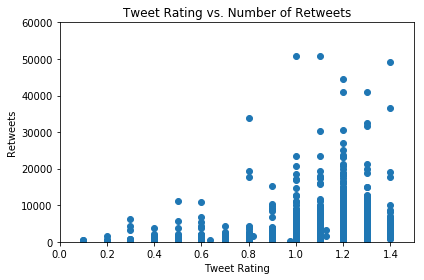

In [1590]:
plt.scatter(x=twitter_df_no.rating_numerator/twitter_df_no.rating_denominator, y=twitter_df_no.retweet_count);
plt.axis((0,1.5,0,60000));
plt.title('Tweet Rating vs. Number of Retweets');
plt.xlabel('Tweet Rating');
plt.ylabel('Retweets');
plt.tight_layout();
plt.savefig('images/rating_retweet.png')

In [1458]:
# Correlation coefficient between rating_numerator/rating_denominator and retweet_count
(twitter_df_no.rating_numerator/twitter_df_no.rating_denominator).corr(twitter_df_no.retweet_count)

0.2146865439718584

#### Plot rating_numerator/rating_denominator and favorite_count

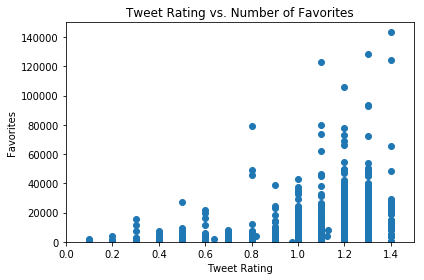

In [1591]:
plt.scatter(x=twitter_df_no.rating_numerator/twitter_df_no.rating_denominator, y=twitter_df_no.favorite_count);
plt.axis((0,1.5,0,150000));
plt.title('Tweet Rating vs. Number of Favorites');
plt.xlabel('Tweet Rating');
plt.ylabel('Favorites');
plt.tight_layout();
plt.savefig('images/rating_favorite.png')

In [1460]:
# Correlation coefficient between rating_numerator/rating_denominator and favorite_count
(twitter_df_no.rating_numerator/twitter_df_no.rating_denominator).corr(twitter_df_no.favorite_count)

0.28474617196612567

There appear to be weak correlations between:
- rating_numerator/rating_denominator and retweet_count with a correlation coefficient of 0.21
- rating_numerator/rating_denominator and favorite_count with a correlation coefficient of 0.28

### Text Length Correlation with rating, retweet_count, and favorite_count

####  Plot text length and rating_numerator/rating_denominator

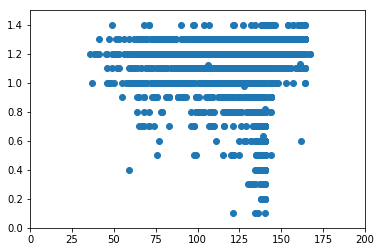

In [1467]:
plt.scatter(x=twitter_df_no.text.apply(lambda x: len(x)), y=twitter_df_no.rating_numerator/twitter_df_no.rating_denominator);
plt.axis((0,200,0,1.5));

In [1468]:
# Correlation coefficient between text length and rating_numerator/rating_denominator
(twitter_df_no.text.apply(lambda x: len(x))).corr(twitter_df_no.rating_numerator/twitter_df_no.rating_denominator)

-0.09712341787457571

####  Plot text length and retweet_count

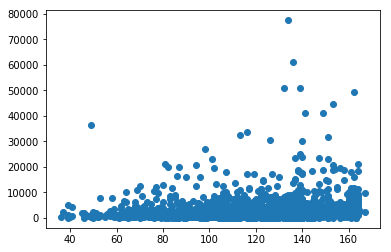

In [1474]:
plt.scatter(x=twitter_df_no.text.apply(lambda x: len(x)), y=twitter_df_no.retweet_count);

In [1475]:
# Correlation coefficient between text length and retweet_count
(twitter_df_no.text.apply(lambda x: len(x))).corr(twitter_df_no.retweet_count)

0.10526461103571648

####  Plot text length and favorite_count

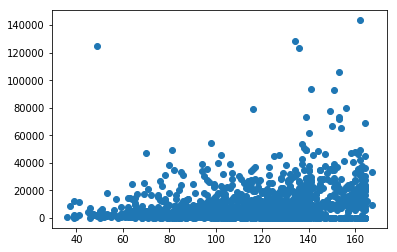

In [1476]:
plt.scatter(x=twitter_df_no.text.apply(lambda x: len(x)), y=twitter_df_no.favorite_count);

In [1478]:
# Correlation coefficient between text length and retweet_count
(twitter_df_no.text.apply(lambda x: len(x))).corr(twitter_df_no.favorite_count)

0.1549993497082043

There do not appear to be correlations between:
- text length and rating_numerator/rating_denominator with a correlation coefficient of -0.10
- text length and retweet_count with a correlation coefficient of 0.11
- text length and favorite_count with a correlation coefficient of 0.15

### Dog Breed Correlation with rating, retweet_count, and favorite_count

####  Modify Data

In [1550]:
# Join image_predictions_df and twitter_archive_df
twitter_df = twitter_df.join(image_df, rsuffix='-r', how='left')
# Drop extra columns
twitter_df.drop(axis=1, columns=['tweet_id-r','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], inplace=True)

In [1551]:
# Subset data for dog breeds with confidence > 0.5, group by dog breed
twitter_subset_df = twitter_df.query('p1_conf > 0.5').query('p1_dog == True').groupby('p1')

####  dog breed and rating_numerator/rating_denominator

In [1554]:
# average rating_numerator/rating_denominator per dog breed
avg_rating_breed = (twitter_group_df.rating_numerator.mean()/twitter_group_df.rating_denominator.mean()).sort_values(ascending=False)
avg_rating_breed

p1
Tibetan_terrier                1.300000
Irish_terrier                  1.300000
black-and-tan_coonhound        1.300000
giant_schnauzer                1.300000
miniature_schnauzer            1.300000
standard_poodle                1.250000
redbone                        1.250000
English_springer               1.233333
Newfoundland                   1.200000
EntleBucher                    1.200000
Japanese_spaniel               1.200000
Welsh_springer_spaniel         1.200000
Mexican_hairless               1.200000
Shih-Tzu                       1.190909
borzoi                         1.166667
Yorkshire_terrier              1.166667
Gordon_setter                  1.150000
Dandie_Dinmont                 1.150000
beagle                         1.144444
malinois                       1.140000
schipperke                     1.133333
Italian_greyhound              1.120000
German_short-haired_pointer    1.120000
collie                         1.120000
soft-coated_wheaten_terrier    1.1176

In [1559]:
print("Mean: %s \nMedian: %s" % (avg_rating_breed.mean(), avg_rating_breed.median()))

Mean: 1.0660042128478873 
Median: 1.0583333333333333


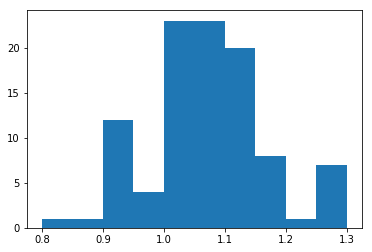

In [1557]:
# Graph dog breed and average rating_numerator/rating_denominator per dog breed
plt.hist(avg_rating_breed);

Per the above table and graph, average rating_numerator/rating_denominator per dog breed show a relative consistency, where there are no dog breeds who's ratings are dramatically higher or lower than other dog breeds. The distribution of average rating_numerator/rating_denominator per dog breed is fairly symmetric with the median and mean both just over 1.

####  dog breed and retweet_count

In [1565]:
# average retweet_count per dog breed
avg_retweet_breed = (twitter_group_df.retweet_count.mean()).sort_values(ascending=False)
avg_retweet_breed

p1
miniature_schnauzer            11293.000000
Tibetan_terrier                10786.000000
Irish_terrier                   8245.000000
groenendael                     6512.000000
Yorkshire_terrier               5831.333333
miniature_poodle                5493.000000
Saint_Bernard                   5047.000000
English_springer                4639.000000
Tibetan_mastiff                 4548.500000
schipperke                      4454.333333
giant_schnauzer                 4382.000000
Shih-Tzu                        4370.363636
toy_poodle                      4202.583333
Lhasa                           4166.500000
Boston_bull                     3908.800000
Rhodesian_ridgeback             3810.000000
Maltese_dog                     3715.533333
Dandie_Dinmont                  3551.000000
Doberman                        3362.000000
English_setter                  3101.200000
Samoyed                         3047.125000
West_Highland_white_terrier     3034.272727
Siberian_husky               

In [1566]:
print("Mean: %s \nMedian: %s" % (avg_retweet_breed.mean(), avg_retweet_breed.median()))

Mean: 2395.3104414974205 
Median: 2034.75


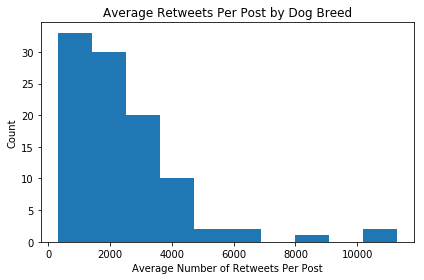

In [1588]:
# Graph dog breed and average retweet_count per dog breed
plt.hist(avg_retweet_breed);
plt.title('Average Retweets Per Post by Dog Breed');
plt.xlabel('Average Number of Retweets Per Post');
plt.ylabel('Count');
plt.tight_layout();
plt.savefig('images/breed_retweet.png')

Per the above table and graph, the average number of retweets per post by dog breed display a long tail, right-skewed distribution with a median of 2,035 retweets per post and a mean of 2,395 retweets per post. The three dog breeds with the highest average number of retweets per post are the Miniature Schnauzer with 11,293, Tibetan Terrier with 10,786, and Irish Terrier with 8,245.

####  dog breed and favorite_count

In [1568]:
# average favorite_count per dog breed
avg_favorite_breed = (twitter_group_df.favorite_count.mean()).sort_values(ascending=False)
avg_favorite_breed

p1
Tibetan_terrier                50631.000000
giant_schnauzer                25619.000000
Yorkshire_terrier              24758.000000
Irish_terrier                  23376.500000
groenendael                    21386.000000
miniature_poodle               17789.000000
Lhasa                          17098.000000
English_springer               16686.666667
keeshond                       14347.000000
Siberian_husky                 11588.750000
black-and-tan_coonhound        11547.000000
standard_poodle                11177.500000
Blenheim_spaniel               11071.833333
Boston_bull                    11070.400000
Dandie_Dinmont                 10829.000000
toy_poodle                     10674.791667
Gordon_setter                  10655.000000
Saint_Bernard                  10529.250000
redbone                        10298.500000
West_Highland_white_terrier     9847.727273
borzoi                          9799.000000
Brittany_spaniel                9260.571429
Japanese_spaniel             

In [1569]:
print("Mean: %s \nMedian: %s" % (avg_favorite_breed.mean(), avg_favorite_breed.median()))

Mean: 7226.002893656991 
Median: 5671.233333333334


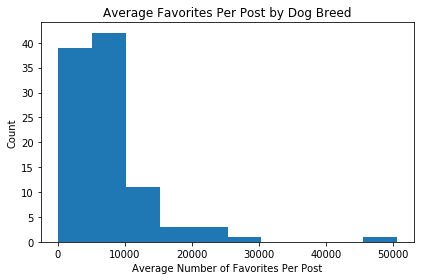

In [1589]:
# Graph dog breed and average favorite_count per dog breed
plt.hist(avg_favorite_breed);
plt.title('Average Favorites Per Post by Dog Breed');
plt.xlabel('Average Number of Favorites Per Post');
plt.ylabel('Count');
plt.tight_layout();
plt.savefig('images/breed_favorite.png')

Per the above table and graph, the average number of favorites per post by dog breed display a long tail, right-skewed distribution with a median of 5,671 favorites per post and a mean of 7,226 favorites per post. The three dog breeds with the highest average number of favorites per post are the Tibetan Terrier with 50,631, Giant Schnauzer with 25,619, and the Yorkshire Terrier with 24,758.